<a href="https://colab.research.google.com/github/DineshReddy0530/Grepthor/blob/master/NLP_Twitter_tweets_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [0]:
train=pd.read_csv('train.csv',index_col='id')
test=pd.read_csv('test.csv',index_col='id')

In [0]:
train.drop(['keyword','location'],axis=1,inplace=True)
test.drop(['keyword','location'],axis=1,inplace=True)

In [0]:
train.head()
#train.shape

,text,target
id,,
1,Our Deeds are the Reason of this #earthquake M...,1
4,Forest fire near La Ronge Sask. Canada,1
5,All residents asked to 'shelter in place' are ...,1
6,"13,000 people receive #wildfires evacuation or...",1
7,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
train[train["target"] == 1]["text"].values[5]


'#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'

In [0]:
import string

In [0]:
train['text']=train['text'].str.lower()

In [0]:
train.head()

,text,target
id,,
1,our deeds are the reason of this #earthquake m...,1
4,forest fire near la ronge sask. canada,1
5,all residents asked to 'shelter in place' are ...,1
6,"13,000 people receive #wildfires evacuation or...",1
7,just got sent this photo from ruby #alaska as ...,1


In [0]:
text=train['text']

In [0]:
text.head()

id
1    our deeds are the reason of this #earthquake m...
4               forest fire near la ronge sask. canada
5    all residents asked to 'shelter in place' are ...
6    13,000 people receive #wildfires evacuation or...
7    just got sent this photo from ruby #alaska as ...
Name: text, dtype: object

In [0]:
def remove_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))
text_clean=text.apply(lambda text:remove_punctuation(text))

In [0]:
text_clean.head()

id
1    our deeds are the reason of this earthquake ma...
4                forest fire near la ronge sask canada
5    all residents asked to shelter in place are be...
6    13000 people receive wildfires evacuation orde...
7    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [0]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [0]:
def stopwords_(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
text_clean = text_clean.apply(lambda text: stopwords_(text))

In [0]:
text_clean.head()

id
1         deeds reason earthquake may allah forgive us
4                forest fire near la ronge sask canada
5    residents asked shelter place notified officer...
6    13000 people receive wildfires evacuation orde...
7    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [0]:
', '.join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [0]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemma(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [0]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
text_clean=text_clean.apply(lambda text: lemma(text))

In [0]:
lemmatizer.lemmatize('wrote', 'v')

'write'

In [0]:
text_clean.head()

id
1           deed reason earthquake may allah forgive u
4                forest fire near la ronge sask canada
5    resident asked shelter place notified officer ...
6    13000 people receive wildfire evacuation order...
7    got sent photo ruby alaska smoke wildfire pour...
Name: text, dtype: object

In [0]:
pip install wordcloud

In [0]:
from wordcloud import WordCloud


Text(0.5, 1.0, 'Frequent Words')

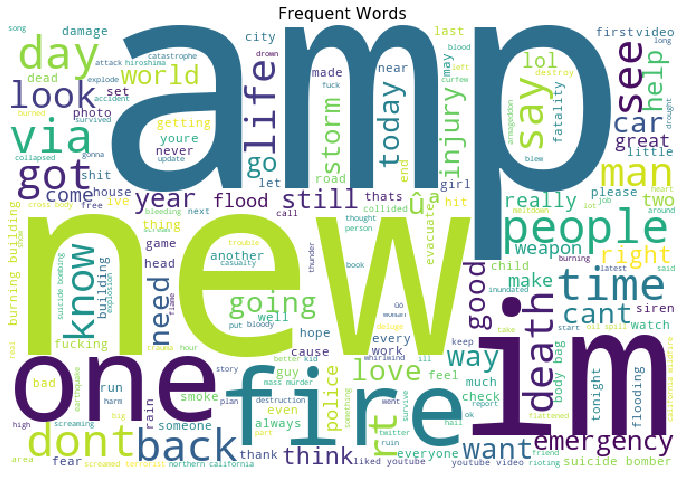

In [0]:
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=[12,12])
wordcloud=WordCloud(background_color='white',width=600,height=400).generate(" ".join(text_clean))
WordCloud().generate(" ".join(text_clean))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=16)

In [0]:
train.head()

,text,target
id,,
1,our deeds are the reason of this #earthquake m...,1
4,forest fire near la ronge sask. canada,1
5,all residents asked to 'shelter in place' are ...,1
6,"13,000 people receive #wildfires evacuation or...",1
7,just got sent this photo from ruby #alaska as ...,1


In [0]:
text_clean.head()

id
1           deed reason earthquake may allah forgive u
4                forest fire near la ronge sask canada
5    resident asked shelter place notified officer ...
6    13000 people receive wildfire evacuation order...
7    got sent photo ruby alaska smoke wildfire pour...
Name: text, dtype: object

In [0]:
df = pd.DataFrame({"text": text_clean})
df

,text
id,
1,deed reason earthquake may allah forgive u
4,forest fire near la ronge sask canada
5,resident asked shelter place notified officer ...
6,13000 people receive wildfire evacuation order...
7,got sent photo ruby alaska smoke wildfire pour...
...,...
10869,two giant crane holding bridge collapse nearby...
10870,ariaahrary thetawniest control wild fire calif...
10871,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj


In [0]:
train.update(df)

In [0]:
train.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [0]:
x=train.iloc[:,0]
y=train.iloc[:,-1]


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(feature_matrix, y, test_size=0.33, random_state=42)

NameError: ignored

In [0]:
train

,text,target
id,,
1,deed reason earthquake may allah forgive u,1
4,forest fire near la ronge sask canada,1
5,resident asked shelter place notified officer ...,1
6,13000 people receive wildfire evacuation order...,1
7,got sent photo ruby alaska smoke wildfire pour...,1
...,...,...
10869,two giant crane holding bridge collapse nearby...,1
10870,ariaahrary thetawniest control wild fire calif...,1
10871,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,1


In [0]:
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(train['text'])

In [0]:
feature_matrix.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import cross_val_score
clf_lg=LogisticRegression()
scores_tfidf = cross_val_score(clf_lg, feature_matrix, train["target"], cv=5, scoring="f1")
print(scores_tfidf)

[0.5877551  0.50805687 0.54064272 0.47729673 0.69107143]


In [0]:
logit = LogisticRegression()


In [0]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [0]:
cv_results = cross_val_score(logit, # Pipeline
                             feature_matrix, # Feature matrix
                             y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1)

In [0]:
cv_results.mean()

In [0]:
logit.fit(feature_matrix,y)

In [0]:
pred=logit.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
score =accuracy_score(y_test,pred)

In [0]:
score